In [1]:
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
import os

load_dotenv()
def set_env_vars(var):
    os.environ[var] = os.getenv(var)


vars = ["OPENAI_API_KEY", "LANGCHAIN_API_KEY", "LANGCHAIN_TRACING_V2", "LANGCHAIN_ENDPOINT", "LANGCHAIN_PROJECT"]

for var in vars:
    set_env_vars(var)

llm = ChatOpenAI(model="gpt-4o-mini")


In [5]:
from pprint import pprint
from langchain_core.messages import HumanMessage, AIMessage

messages = [AIMessage(content="So you said you were researching about ocean animals?", name="Chatbot"), 
            HumanMessage(content="Yes I know about whales but else should I lrean about?", name="Hrithik"), 
            ]

for message in messages:
    message.pretty_print()



================================== Ai Message ==================================
Name: Chatbot

So you said you were researching about ocean animals?
================================ Human Message =================================
Name: Hrithik

Yes I know about whales but else should I lrean about?


In [6]:
llm.invoke(messages)

AIMessage(content='There are many fascinating ocean animals you can learn about! Here are a few suggestions:\n\n1. **Dolphins**: Known for their intelligence and playful behavior, dolphins are social creatures that often live in pods.\n\n2. **Sharks**: These apex predators come in many species, each with unique adaptations. Learning about their role in marine ecosystems can be very enlightening.\n\n3. **Octopuses**: Known for their intelligence and ability to camouflage, octopuses have fascinating behaviors and biological features, including their eight arms and three hearts.\n\n4. **Sea Turtles**: These ancient reptiles have been around for millions of years. Learning about their life cycle and the challenges they face can be quite compelling.\n\n5. **Jellyfish**: With their mesmerizing movements and unique life cycles, jellyfish are intriguing creatures. Some species are bioluminescent, adding to their allure.\n\n6. **Coral Reefs**: While not an animal themselves, coral reefs are mad

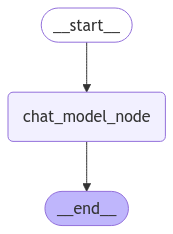

In [7]:
from langgraph.graph import MessagesState, StateGraph, START, END
from IPython.display import Image, display


def chat_model_node(state: MessagesState) -> MessagesState:
    return {"messages" : llm.invoke(state["messages"])}

builder = StateGraph(MessagesState)
builder.add_node("chat_model_node", chat_model_node)
builder.add_edge(START, "chat_model_node")
builder.add_edge("chat_model_node", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [8]:
result = graph.invoke({"messages": messages})

for message in result["messages"]:
    message.pretty_print()

================================== Ai Message ==================================
Name: Chatbot

So you said you were researching about ocean animals?
================================ Human Message =================================
Name: Hrithik

Yes I know about whales but else should I lrean about?
================================== Ai Message ==================================

There are many fascinating ocean animals you can learn about! Here are a few suggestions:

1. **Dolphins**: Known for their intelligence and social behavior, dolphins are often seen in pods and have complex communication skills.

2. **Sharks**: These apex predators come in various species, each with unique adaptations. Learning about their role in the ecosystem can be quite interesting.

3. **Octopuses**: Known for their intelligence and problem-solving abilities, octopuses have unique features like camouflage and the ability to regenerate limbs.

4. **Sea Turtles**: These ancient mariners have fascinating lif

# Reducer

Modify the graph state to remove and send only the last two messages


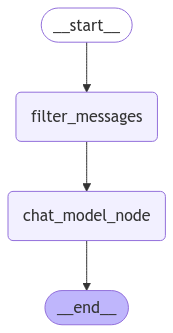

In [10]:
from langchain_core.messages import RemoveMessage

def filter_messages(state: MessagesState) -> MessagesState:
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"messages" : delete_messages}

def chat_model_node(state: MessagesState) -> MessagesState:
    return {"messages" : llm.invoke(state["messages"])} 

builder = StateGraph(MessagesState)
builder.add_node("filter_messages", filter_messages)
builder.add_node("chat_model_node", chat_model_node)
builder.add_edge(START, "filter_messages")
builder.add_edge("filter_messages", "chat_model_node")
builder.add_edge("chat_model_node", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
messages = [AIMessage("Hi.", name="Bot", id="1")]
messages.append(HumanMessage("Hi.", name="Hrithik", id="2"))
messages.append(AIMessage("So you said you were researching ocean mammals?", name="Bot", id="3"))
messages.append(HumanMessage("Yes, I know about whales. But what others should I learn about?", name="Hrithik", id="4"))

result = graph.invoke({"messages": messages})

for message in result["messages"]:
    message.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Hrithik

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several fascinating ocean mammals you might want to explore:

1. **Dolphins**: Known for their intelligence and social behavior, dolphins are often found in groups called pods. The bottlenose dolphin is one of the most recognized species.

2. **Porpoises**: Similar to dolphins but generally smaller and with a different snout shape, porpoises are also social and can be found in various marine environments.

3. **Seals**: There are two main types of seals: earless seals (phocids) and eared seals (otariids). They are known for their ability to swim and haul out on land.

4. **Sea L

# Filtering Messages

Doesnt modify the graph state just limit the number of messages sent to llm


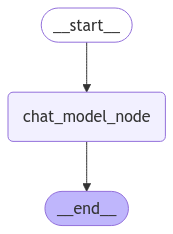

In [13]:
def chat_model_node(state: MessagesState) -> MessagesState:
    return {"messages" : llm.invoke(state["messages"][-1:])}

builder = StateGraph(MessagesState)
builder.add_node("chat_model_node", chat_model_node)
builder.add_edge(START, "chat_model_node")
builder.add_edge("chat_model_node", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
messages.append(result["messages"][-1])
messages.append(HumanMessage("Tell me more about whales!", name="Hrithik", id="5"))

for message in messages:
    message.pretty_print()



================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Hrithik

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Hrithik

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several fascinating ocean mammals you might want to explore:

1. **Dolphins**: Known for their intelligence and social behavior, dolphins are often found in groups called pods. The bottlenose dolphin is one of the most recognized species.

2. **Porpoises**: Similar to dolphins but generally smaller and with a different snout shape, porpoises are also social and can be found in various m

In [18]:
for message in messages:
    print(message)

content='Hi.' additional_kwargs={} response_metadata={} name='Bot' id='1'
content='Hi.' additional_kwargs={} response_metadata={} name='Hrithik' id='2'
content='So you said you were researching ocean mammals?' additional_kwargs={} response_metadata={} name='Bot' id='3'
content='Yes, I know about whales. But what others should I learn about?' additional_kwargs={} response_metadata={} name='Hrithik' id='4'
content='In addition to whales, there are several fascinating ocean mammals you might want to explore:\n\n1. **Dolphins**: Known for their intelligence and social behavior, dolphins are often found in groups called pods. The bottlenose dolphin is one of the most recognized species.\n\n2. **Porpoises**: Similar to dolphins but generally smaller and with a different snout shape, porpoises are also social and can be found in various marine environments.\n\n3. **Seals**: There are two main types of seals: earless seals (phocids) and eared seals (otariids). They are known for their ability 

In [22]:
from langgraph.graph.message import add_messages
new_message = HumanMessage(content="Tell me more about Seals!", name="Hrithik", id="5")

messages = add_messages(messages, new_message)

for message in messages:
    message.pretty_print()




================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Hrithik

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Hrithik

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several fascinating ocean mammals you might want to explore:

1. **Dolphins**: Known for their intelligence and social behavior, dolphins are often found in groups called pods. The bottlenose dolphin is one of the most recognized species.

2. **Porpoises**: Similar to dolphins but generally smaller and with a different snout shape, porpoises are also social and can be found in various m

In [23]:
result = graph.invoke({"messages": messages})

for message in result["messages"]:
    message.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Hrithik

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Hrithik

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several fascinating ocean mammals you might want to explore:

1. **Dolphins**: Known for their intelligence and social behavior, dolphins are often found in groups called pods. The bottlenose dolphin is one of the most recognized species.

2. **Porpoises**: Similar to dolphins but generally smaller and with a different snout shape, porpoises are also social and can be found in various m

# Trim Messages

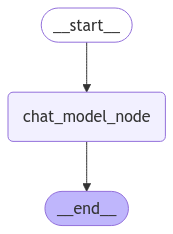

In [34]:
from langchain_core.messages import trim_messages

def chat_model_node(state: MessagesState) -> MessagesState:
    messages = trim_messages(
            state["messages"],
            max_tokens=100,
            strategy = "last",
            token_counter = ChatOpenAI(model="gpt-4o"),
            allow_partial=True,
        )
    return {"messages": [llm.invoke(messages)]}

builder = StateGraph(MessagesState)
builder.add_node("chat_model_node", chat_model_node)
builder.add_edge(START, "chat_model_node")
builder.add_edge("chat_model_node", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
messages.append(result["messages"][-1])

for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Hrithik

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Hrithik

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several fascinating ocean mammals you might want to explore:

1. **Dolphins**: Known for their intelligence and social behavior, dolphins are often found in groups called pods. The bottlenose dolphin is one of the most recognized species.

2. **Porpoises**: Similar to dolphins but generally smaller and with a different snout shape, porpoises are also social and can be found in various m

In [27]:
messages.append(HumanMessage("Tell me hot Seals reproduce", name="Hrithik"))

In [33]:
trim_messages(messages, max_tokens=100, strategy="last", token_counter=ChatOpenAI(model="gpt-4o"), allow_partial=True)

[AIMessage(content='- Seals are known for their playful behavior and are often seen riding waves or playing with each other.\n\nOverall, seals are fascinating creatures that play an important role in marine ecosystems. Their adaptations make them unique among marine mammals, and they are a subject of interest for researchers and wildlife enthusiasts alike.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 511, 'prompt_tokens': 18, 'total_tokens': 529, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_d02d531b47', 'finish_reason': 'stop', 'logprobs': None}, id='run-71a56884-3db6-48f2-820e-7e78d05277c3-0', usage_metadata={'input_tokens': 18, 'output_tokens': 511, 'total_tokens': 529, 'input_token_details': {'audio': 0, 'cache

In [35]:
result_with_trim_msgs = graph.invoke({"messages": messages})

for message in result_with_trim_msgs["messages"]:
    message.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Hrithik

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Hrithik

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several fascinating ocean mammals you might want to explore:

1. **Dolphins**: Known for their intelligence and social behavior, dolphins are often found in groups called pods. The bottlenose dolphin is one of the most recognized species.

2. **Porpoises**: Similar to dolphins but generally smaller and with a different snout shape, porpoises are also social and can be found in various m